In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [6]:
y_train.shape, y_test.shape

((50000,), (10000,))

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

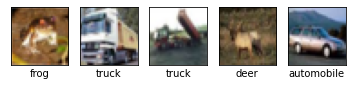

In [9]:
for i in range (0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])
    plt.yticks([])
    plt.xticks([])

plt.show()

In [10]:
data_augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(32,32,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [11]:
cnn_model= keras.models.Sequential([
    #convolutionalNN
    data_augmentation,
    keras.layers.Conv2D(30,3,padding='same',activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(60,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
    
])

In [12]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnn_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.7184 - accuracy: 0.3761
Epoch 2/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4661 - accuracy: 0.4685
Epoch 3/10
1563/1563 [==============================] - 110s 71ms/step - loss: 1.3753 - accuracy: 0.5068
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3218 - accuracy: 0.5285
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2853 - accuracy: 0.5411
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2590 - accuracy: 0.5526
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2329 - accuracy: 0.5615
Epoch 8/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2105 - accuracy: 0.5705
Epoch 9/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1949 - accuracy: 0.5761
Epoch 10/10
1563/1563 [==============================] - 86s 5

In [14]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.0285 - accuracy: 0.6386


[1.0284572839736938, 0.6385999917984009]

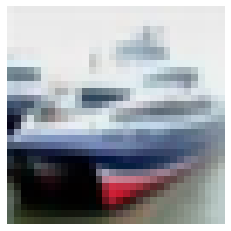

In [15]:
plt.axis('off')
plt.imshow(x_test[1])

In [16]:
y_pred=cnn_model.predict(x_test)

In [17]:
y_class=[np.argmax(i) for i in y_pred]

Text(0.5, 0, 'ship')

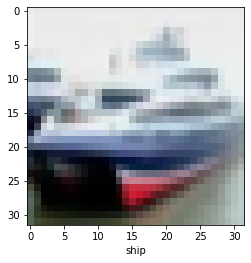

In [18]:
plt.imshow(x_test[1])
plt.xlabel(classes[y_test[1]])

In [19]:
classes[y_class[1]]

'ship'

In [20]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_class)

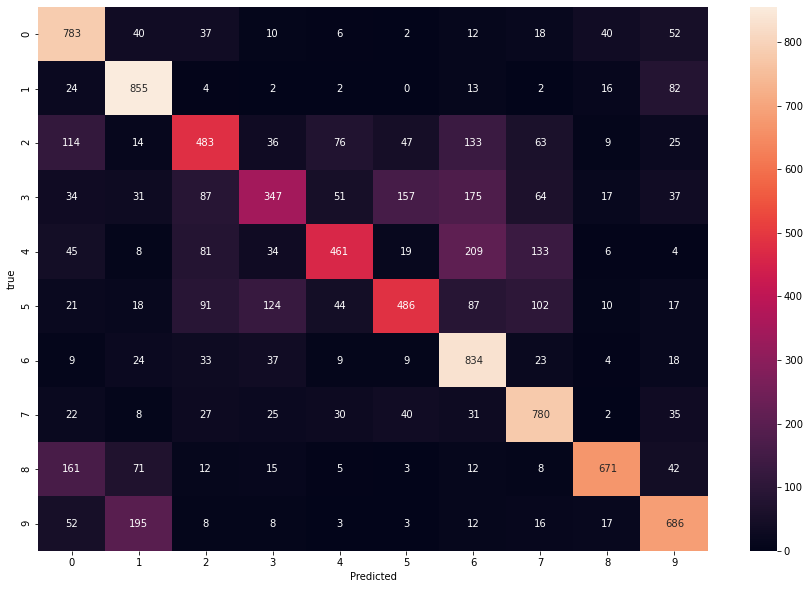

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('true')
plt.show()